#ML - BOOSTING

                                 SUBMITTED BY: MD FAHAM NAUSHAD

#***************************************************
##Questions:

#***************************************************
##1. What is Boosting in Machine Learning? Explain how it improves weak learners.
- Answer:

  Boosting is an ensemble technique that combines many weak learners (models that perform slightly better than random) to create a strong learner. Models are trained sequentially, where each new model focuses more on the mistakes of the previous ones. By re-weighting misclassified samples, boosting reduces bias and improves accuracy. Popular boosting algorithms include AdaBoost, Gradient Boosting, XGBoost, and CatBoost.

##2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
- Answer:

  AdaBoost adjusts sample weights after each model: misclassified points get higher weights so later models focus on them more. Gradient Boosting, instead, fits new models to the residual errors (gradients of the loss function) of the previous model. AdaBoost mainly uses exponential loss, while Gradient Boosting can optimize many different loss functions. Both are sequential, but their update mechanisms differ.

##3. How does regularization help in XGBoost?
- Answer:

  Regularization in XGBoost (L1 and L2 penalties on leaf weights) helps control model complexity. It discourages overly large leaf values and very deep or complex trees. This reduces overfitting, improves generalization, and makes the model more robust. Parameters like lambda, alpha, max_depth, and min_child_weight are key regularization controls in XGBoost.

##4. Why is CatBoost considered efficient for handling categorical data?
- Answer:

  CatBoost natively supports categorical features without needing manual one-hot encoding. It uses techniques like ordered statistics and target-based encoding in a way that avoids target leakage. This makes it efficient, reduces preprocessing effort, and often improves accuracy on datasets with many categorical variables. It also tends to work well with fewer hyperparameter tweaks.

##5. What are some real-world applications where boosting techniques are preferred over bagging methods?
- Answer:

  Boosting is preferred when we need high accuracy on complex patterns, such as in credit scoring, fraud detection, click-through rate prediction, and customer churn prediction. These tasks often involve subtle relationships and imbalanced data. Boosting methods like XGBoost and CatBoost often outperform bagging methods because they focus on correcting previous errors and can capture complex decision boundaries.

    • Datasets:

    - ● Use sklearn.datasets.load_breast_cancer() for classification tasks.

    - ● Use sklearn.datasets.fetch_california_housing() for regression tasks.

##6. Write a Python program to:

   ● Load the Breast Cancer dataset using sklearn.datasets.load_breast_cancer()

   ● Train an AdaBoost Classifier on the Breast Cancer dataset
    
   ● Print the model accuracy

###✅Python Code:

In [ ]:
# Q6: AdaBoost on Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# AdaBoost classifier
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("AdaBoost Accuracy on Breast Cancer dataset:", round(acc, 4))


AdaBoost Accuracy on Breast Cancer dataset: 0.9591


##7. Write a Python program to:
   ● Train a Gradient Boosting Regressor on the California Housing dataset
   
   ● Evaluate performance using R-squared score


###✅Python Code:

In [ ]:
# Q7: Gradient Boosting Regressor on California Housing
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
cal = fetch_california_housing()
X = cal.data
y = cal.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

# Predictions and R-squared
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor R-squared on California Housing:", round(r2, 4))


Gradient Boosting Regressor R-squared on California Housing: 0.7805


##8. Write a Python program to:

  ● Train an XGBoost Classifier on the Breast Cancer dataset

  ● Tune the learning rate using GridSearchCV

  ● Print the best parameters and accuracy


  ###✅Python Code:

In [ ]:
# Q8: XGBoost with GridSearchCV on Breast Cancer dataset
!pip install xgboost -q

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Base XGBoost model
xgb = XGBClassifier(
    max_depth=3,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Hyperparameter grid for learning rate
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid.best_params_)
print("Test Accuracy with best learning_rate:", round(acc, 4))


Best Parameters: {'learning_rate': 0.2}
Test Accuracy with best learning_rate: 0.9649


##9. Write a Python program to:

● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn

###✅Python Code:

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.2 MB/s eta 0:00:00
CatBoost Accuracy on Breast Cancer dataset: 0.9591


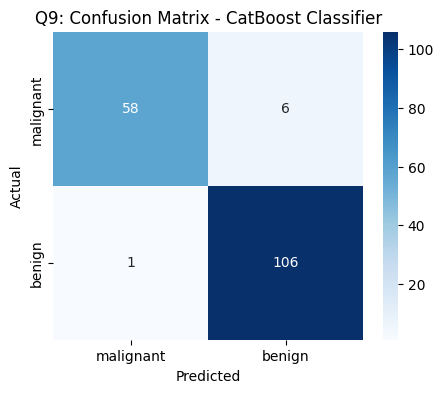

In [ ]:
# Q9: CatBoost Classifier + Confusion Matrix
!pip install catboost -q

from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# CatBoost classifier (silent mode to avoid large logs)
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.05,
    depth=4,
    verbose=False,
    random_seed=42
)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("CatBoost Accuracy on Breast Cancer dataset:", round(acc, 4))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Q9: Confusion Matrix - CatBoost Classifier')
plt.show()


##10. You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior. The dataset is imbalanced, contains missing values, and has both numeric and categorical features.

  - Describe your step-by-step data science pipeline using boosting techniques:
    - ● Data preprocessing & handling missing/categorical values
    - ● Choice between AdaBoost, XGBoost, or CatBoost
    - ● Hyperparameter tuning strategy
    - ● Evaluation metrics you'd choose and why
    - ● How the business would benefit from your model


## ● Answer (Step-by-step explanation):

###1.   Data preprocessing & handling missing/categorical values
*   Use SimpleImputer or similar to fill missing numeric values (mean/median) and categorical values (most frequent).
*   Use OneHotEncoder for categorical variables if using AdaBoost or XGBoost.
*   If using CatBoost, feed categorical indices directly since it handles them natively.
*   Scale is less critical for tree-based boosting but may still be used.


###2.   Choice between AdaBoost, XGBoost, or CatBoost
*   If many categorical features → CatBoost is ideal.
*   If numeric-heavy and large dataset → XGBoost is a strong choice.
*   AdaBoost is simpler and can be used for baseline.
*   For a modern FinTech loan default case, XGBoost or CatBoost is generally preferred.

###3. Hyperparameter tuning strategy
*   Use GridSearchCV or RandomizedSearchCV on parameters like learning_rate, n_estimators, max_depth, subsample, and regularization terms.
*   Apply stratified k-fold cross-validation due to class imbalance.

###4. Evaluation metrics
*   Use ROC-AUC, Precision-Recall (especially for minority default class), F1-score, and confusion matrix.
*   Plain accuracy may be misleading in imbalanced data.

###5. Business benefit
*   More accurate default predictions reduce financial risk by avoiding risky loans.
*   Helps approve more safe customers, increasing profit.
*   Supports regulatory reporting and better credit policy design.


###✅Python Code:


In [ ]:
# Q10: Example Boosting Pipeline for Loan Default Prediction (synthetic data)
!pip install xgboost -q

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier

# Synthetic dataset (for demonstration)
np.random.seed(42)
n_samples = 1000

data = pd.DataFrame({
    'age': np.random.randint(21, 70, n_samples),
    'income': np.random.randint(20000, 200000, n_samples),
    'gender': np.random.choice(['M', 'F'], n_samples),
    'city': np.random.choice(['A', 'B', 'C'], n_samples),
    'transactions_per_month': np.random.randint(5, 100, n_samples),
    'default': np.random.choice([0, 1], n_samples, p=[0.85, 0.15])  # imbalanced
})

# Introduce some missing values
for col in ['age', 'income', 'gender']:
    idx = np.random.choice(n_samples, size=50, replace=False)
    data.loc[idx, col] = np.nan

X = data.drop('default', axis=1)
y = data['default']

# Identify column types
numeric_features = ['age', 'income', 'transactions_per_month']
categorical_features = ['gender', 'city']

numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# XGBoost classifier (scale_pos_weight to roughly handle imbalance)
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y.value_counts()[0] / y.value_counts()[1]),
    eval_metric='logloss',
    random_state=42
)

clf = Pipeline(steps=[('preprocess', preprocessor),
                     ('model', xgb_model)])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Cross-validation ROC-AUC
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='roc_auc')

# Fit final model and evaluate on test set
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)
test_auc = roc_auc_score(y_test, y_proba)

print("Cross-Validation ROC-AUC scores:", np.round(cv_scores, 4))
print("Mean CV ROC-AUC:", round(cv_scores.mean(), 4))
print("Test ROC-AUC:", round(test_auc, 4))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))


Cross-Validation ROC-AUC scores: [0.505  0.6087 0.5906 0.5123 0.6623]
Mean CV ROC-AUC: 0.5758
Test ROC-AUC: 0.4425

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       218
           1       0.13      0.19      0.15        32

    accuracy                           0.74       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.78      0.74      0.76       250



###************** END  **************